# Análisis Descriptivo: Análisis de Tendencias de las ventas del negocio

El análisis de tendencia es una técnica estadística que se utiliza para identificar patrones o tendencias en un conjunto de datos a lo largo del tiempo. El análisis de tendencia es utilizado para predecir la dirección futura del comportamiento de los datos basándose en su comportamiento pasado.

### Carga de las librerías de pyhton necesarias

In [3]:
!pip install seaborn

In [4]:
# Debe instalar las librerias necesarias antes del import
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

Las librerías de Python son conjuntos de código predefinidos que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

### Conexión a SQL Server y extracción de los datos

- Explique línea a línea el código mostrado abajo. Debe explicar tambien la query. Puede probar aparte la query desde Azure Data Studio o directamente desde SQL Server Managment Studio.

In [3]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=ANGELICA_RIOS_G;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
# En Server=BALRODJJ debes colocar el nombre de tu base de datos.
# Lo demás se deja igual
input_query = '''select
	 year(t1.OrderDate) as 'año',  
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'
from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate) 
	order by year(t1.OrderDate), month(t1.OrderDate)'''

ventas = pd.read_sql(input_query, conn_str)

C:\Users\nanaw\AppData\Local\Temp\ipykernel_12540\1963310288.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas = pd.read_sql(input_query, conn_str)


- 1.  conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=ANGELICA_RIOS_G;''Database=AdventureWorks2019;''Trusted_Connection=yes;'): Esta línea crea una conexión a una base de datos SQL Server utilizando la biblioteca pyodbc. Veamos los detalles:
- 'Driver={SQL Server};': Aquí se especifica el controlador (driver) que se utilizará para conectarse a SQL Server.
- 'Server=ANGELICA_RIOS_G;': Indica el nombre del servidor SQL al que se conectará. En este caso, el servidor se llama “ANGELICA_RIOS_G”.
- 'Database=AdventureWorks2019;': Especifica la base de datos a la que se accederá. En este ejemplo, se utiliza la base de datos “AdventureWorks2019”.
- 'Trusted_Connection=yes;': Esta parte indica que se utilizará una conexión de confianza (trusted connection), lo que significa que se autenticará automáticamente utilizando las credenciales del usuario actual.
# En Server=BALRODJJ debes colocar el: Este comentario sugiere que debes reemplazar “ANGELICA_RIOS_G” con el nombre de tu propio servidor SQL en la línea anterior. Por lo tanto, si tienes un servidor llamado “BALRODJJ”, debes modificar la cadena de conexión para que se ajuste a tu configuración específica.
En resumen, el código establece una conexión a una base de datos SQL Server llamada “AdventureWorks2019” en el servidor “ANGELICA_RIOS_G”, utilizando una conexión de confianza. Si deseas utilizar otro servidor, simplemente cambia el nombre en la cadena de conexión

# Explicación Query: 
1. year(t1.OrderDate) as 'año': Esta parte extrae el año de la columna OrderDate y lo nombra como ‘año’.
2. month(t1.OrderDate) as 'mes': Aquí se obtiene el mes de la misma columna y se le asigna el alias ‘mes’.
3. sum(t1.TotalDue) as 'ventas': Calcula la suma de los valores en la columna TotalDue y la etiqueta como ‘ventas’.
4. from Sales.SalesOrderHeader as t1: Indica que los datos provienen de la tabla SalesOrderHeader y se le asigna el alias t1.
5. group by year(t1.OrderDate), month(t1.OrderDate): Agrupa los resultados por año y mes.
6. order by year(t1.OrderDate), month(t1.OrderDate): Ordena los resultados en orden ascendente por año y mes.
Esta consulta recopila datos de la tabla SalesOrderHeader, calcula las ventas totales por mes y año, y los presenta en un formato tabular. Luego, el resultado se carga en un DataFrame de pandas llamado ventas.

In [4]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### El código **no** da error, sin embargo imprime un `warning` donde se sugiere el uso de `SQLAlchemy` en vez de `pyodbc`. Investigue como se hace la conexión a SQL Server con SQLAlchemy utilizando la misma base de datos , pruebe con la misma query anterior, guardar los resultados en un nuevo dataframe usando read_sql e imprima la tabla. Explicar linea por linea el código utilizado.

In [2]:
!pip install sqlalchemy pyodbc

In [5]:
from sqlalchemy import create_engine
import pandas as pd

# Crear la cadena de conexión usando SQLALchemy
engine = create_engine('mssql+pyodbc://ANGELICA_RIOS_G/AdventureWorks2019?driver=SQL+Server&trusted_connection=yes')

# Definir la consulta SQL
input_query = '''
SELECT
    YEAR(t1.OrderDate) AS 'año',
    MONTH(t1.OrderDate) AS 'mes',
    SUM(t1.TotalDue) AS 'ventas'
FROM Sales.SalesOrderHeader AS t1
GROUP BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
ORDER BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
'''
# Ejecutar la consulta y leer los datos en una DataFrame 
ventas = pd.read_sql(input_query, engine)

# Mostrar el DataFrame
print(ventas)


     año  mes     ventas
0   2011    5  567020.95
1   2011    6  507096.47
2   2011    7 2292182.88
3   2011    8 2800576.17
4   2011    9  554791.61
5   2011   10 5156269.53
6   2011   11  815313.02
7   2011   12 1462448.90
8   2012    1 4458337.44
9   2012    2 1649051.90
10  2012    3 3336347.47
11  2012    4 1871923.50
12  2012    5 3452924.45
13  2012    6 4610647.22
14  2012    7 3840231.46
15  2012    8 2442451.18
16  2012    9 3881724.19
17  2012   10 2858060.20
18  2012   11 2097153.13
19  2012   12 3176848.17
20  2013    1 2340061.55
21  2013    2 2600218.87
22  2013    3 3831605.94
23  2013    4 2840711.17
24  2013    5 3658084.95
25  2013    6 5726265.26
26  2013    7 5521840.84
27  2013    8 3733973.00
28  2013    9 5083505.34
29  2013   10 5374375.94
30  2013   11 3694668.00
31  2013   12 4560577.10
32  2014    1 4798027.87
33  2014    2 1478213.29
34  2014    3 8097036.31
35  2014    4 1985886.15
36  2014    5 6006183.21
37  2014    6   54151.48


In [6]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### Exploración del dataset extraído (ventas)

- Muestre la información general del dataframe (info):

In [9]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     38 non-null     int64  
 1   mes     38 non-null     int64  
 2   ventas  38 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


- Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [11]:
ventas_resumen = ventas["ventas"].describe()
print("\n Resumen de las principales estadisticas descriptivas")
ventas_resumen


 Resumen de las principales estadisticas descriptivas


count        38.00
mean    3242547.00
std     1787700.91
min       54151.48
25%     2013702.89
50%     3256597.82
75%     4535017.18
max     8097036.31
Name: ventas, dtype: float64

- Mostrar las dimensiones del dataset

In [19]:
print(ventas.shape) #Tupla con número de filas y el número de columnas DataFrame
print(len(ventas))  # Se obtiene el número de filas
print(ventas.size)  #  Se obtiene el número de elementos de la dataFrame 38 x3
print(ventas.ndim) # Se ve el número de dimensiones de la DataFrame

(38, 3)
38
114
2


- Imprimir en un objeto tipo Index todas las columnas del dataframe

In [24]:
indices_columnas = ventas.columns
print(indices_columnas)

Index(['año', 'mes', 'ventas'], dtype='object')


- Muestre el contenido de las primeras 15 líneas del dataframe

In [25]:
ventas_primeras_15 = ventas.iloc[:15]
ventas_primeras_15 

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


- Muestre las últimas cinco líneas del dataframe

In [27]:
ventas_ultimas_15 = ventas.tail(15)
ventas_ultimas_15 

,año,mes,ventas
23,2013,4,2840711.17
24,2013,5,3658084.95
25,2013,6,5726265.26
26,2013,7,5521840.84
27,2013,8,3733973.00
28,2013,9,5083505.34
29,2013,10,5374375.94
30,2013,11,3694668.00
31,2013,12,4560577.10
32,2014,1,4798027.87


- Calcule Correlaciones y Covarianzas. Explicar resultados

In [29]:
correlacion = ventas['año'].corr(ventas['ventas'])
correlacion

np.float64(0.4183269283862146)

In [32]:
# Calcula la matriz de correlación
correlacion = ventas.corr()

print("Correlación:")
print(correlacion)

Correlación:
         año   mes  ventas
año     1.00 -0.40    0.42
mes    -0.40  1.00   -0.04
ventas  0.42 -0.04    1.00


- Correlación entre “año” y “mes”:
El valor es -0.40.
Esto indica una correlación negativa moderada entre el año y el mes.
Cuando el año aumenta, el mes tiende a disminuir y viceversa.
- Correlación entre “año” y “ventas”:
El valor es 0.42.
Esto sugiere una correlación positiva moderada entre el año y las ventas.
A medida que el año aumenta, las ventas también tienden a aumentar.
- Correlación entre “mes” y “ventas”:
El valor es -0.04.
La correlación es cercana a cero, lo que indica que no hay una relación lineal fuerte entre el mes y las ventas.

In [38]:
# Calcula la covarianza
covarianza = ventas.cov()

print( "Covarianza")
print(covarianza)

Covarianza
             año        mes           ventas
año         1.01      -1.38        750498.19
mes        -1.38      11.66       -241446.93
ventas 750498.19 -241446.93 3195874540096.30


- Covarianza entre “año” y “mes”:
El valor es -1.38.
Esto indica una relación negativa entre el año y el mes. En otras palabras, cuando el año aumenta, el mes tiende a disminuir y viceversa.
- Covarianza entre “año” y “ventas”:
El valor es 750498.19.
Esto sugiere una relación positiva entre el año y las ventas. A medida que el año aumenta, las ventas también tienden a aumentar.
- Covarianza entre “mes” y “ventas”:
El valor es -241446.93.
Esto indica una relación negativa entre el mes y las ventas. Cuando el mes aumenta, las ventas tienden a disminuir y viceversa.

## Visualización gráfica de los datos

### Gráfico de barras de las ventas por mes

Se realiza una exploración visual de curva que dibuja las ventas agrupadas por mes.

- Explique línea por línea el siguiente código:

In [ ]:

ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()
#Aquí estamos creando un nuevo DataFrame llamado ventas_por_mes.
#Utilizamos el método groupby('mes') para agrupar los datos originales por la columna “mes”.
#Luego, seleccionamos la columna “ventas” y aplicamos la función de agregación sum() para obtener la suma 
# total de las ventas para cada mes.
#Finalmente, utilizamos reset_index() para reiniciar los índices del DataFrame resultante.

sns.barplot(x='mes', y='ventas', data=ventas_por_mes)
#Estamos creando un gráfico de barras utilizando la biblioteca Seaborn (importada como sns).
#En el eje x (horizontal), representamos los valores de la columna “mes”.
#En el eje y (vertical), representamos los valores de la columna “ventas”.
#Utilizamos los datos del DataFrame ventas_por_mes.

plt.title('Ventas por mes')
#Establecemos un título para el gráfico. En este caso, el título es “Ventas por mes”.

plt.show()
#Finalmente, mostramos el gráfico en la pantalla.

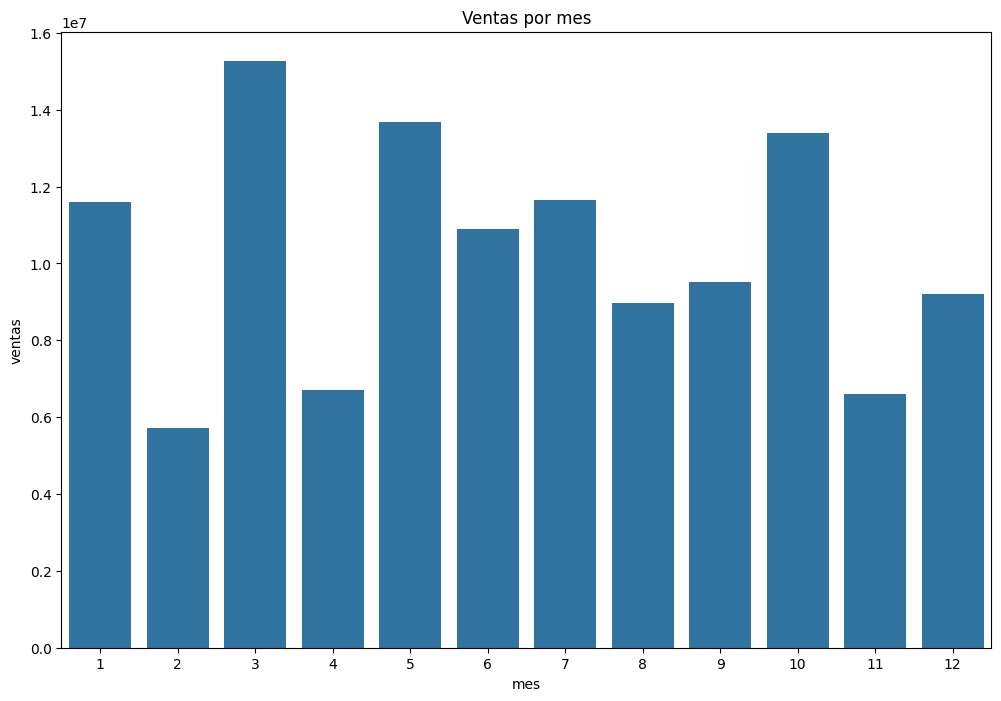

In [39]:
ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()
sns.barplot(x='mes', y='ventas', data=ventas_por_mes)
plt.title('Ventas por mes')
plt.show()

In [40]:
print(ventas_por_mes)

    mes      ventas
0     1 11596426.87
1     2  5727484.06
2     3 15264989.72
3     4  6698520.83
4     5 13684213.56
5     6 10898160.43
6     7 11654255.19
7     8  8977000.36
8     9  9520021.13
9    10 13388705.67
10   11  6607134.14
11   12  9199874.16


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

En el gráfico proyectado se observa que en el mes(3)=15264989.72 se alcanzaron las mayores ventas, seguidas del mes(5)= 13684213.56 y mes(10) = 13388705.67
los meses con menores ventas son el mes(2)= 5727484.06  mes(4)=6698520.83 y 11=6607134.14

### Gráfico de línea de las ventas por año

Se observa la curva que dibuja la evolución de las ventas agrupadas por año.

- Explique línea por línea el siguiente código:

In [ ]:
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()
#Aquí estamos agrupando los datos de ventas por año. La función groupby('año') agrupa
#los datos según la columna ‘año’, y luego aplicamos la función sum() a la columna ‘ventas’ 
#para obtener la suma total de ventas por año. El resultado se almacena en un nuevo DataFrame llamado ventas_por_año.

plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
#Esta línea crea un gráfico de líneas utilizando los datos del DataFrame ventas_por_año. El eje x representa los años (‘año’)
#y el eje y representa las ventas (‘ventas’).

plt.title('Ventas por año') #Establece el título del gráfico como “Ventas por año”.
plt.xlabel('Año') # Etiqueta el eje x como “Año”.
plt.ylabel('Ventas') #Etiqueta el eje y como “Ventas”.
plt.show() # Muestra el gráfico en la pantalla.

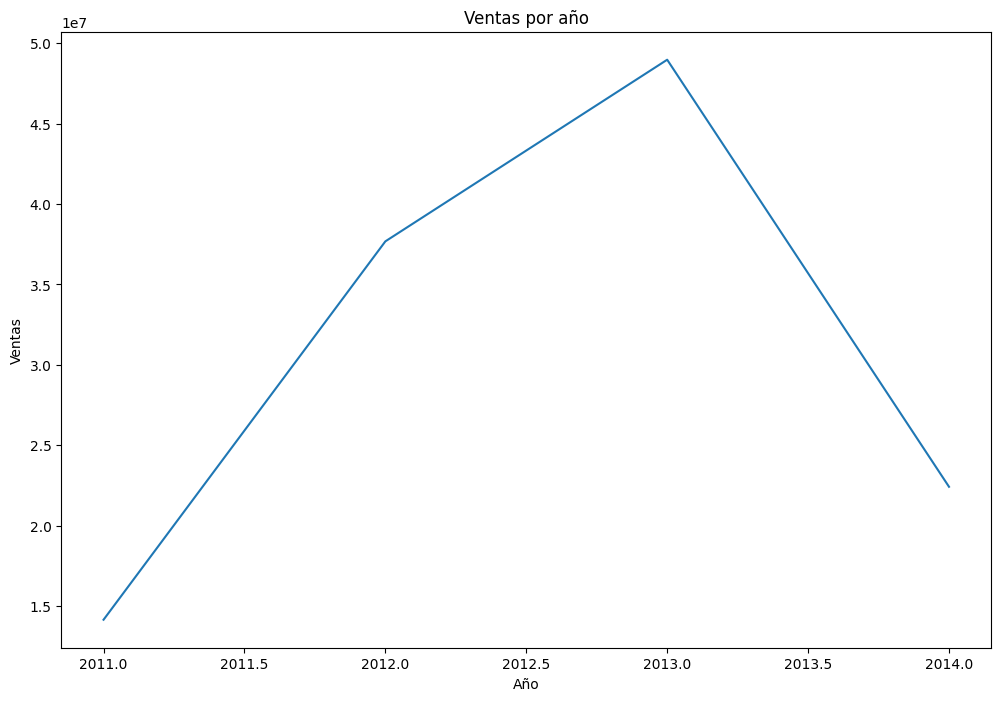

In [6]:
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
plt.title('Ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()

In [43]:
ventas_por_año

,año,ventas
0,2011,14155699.53
1,2012,37675700.31
2,2013,48965887.96
3,2014,22419498.32


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

Este gráfico visualiza cómo las ventas han variado a lo largo del tiempo (años). Observamos una tendencia creciente desde 2011 hasta 2013 alcanzado su mayor pico en el 2013, seguida de una fuerte disminución en las ventas en 2014

### Prueba formal: Prueba de tendencia

Existen diferentes métodos para realizar el análisis de tendencia, pero uno de los más utilizados es la regresión lineal. La regresión lineal es una técnica estadística que se utiliza para encontrar la relación entre una variable dependiente (por ejemplo, el precio de una acción) y una o más variables independientes (por ejemplo, el tiempo).

Se realiza una prueba de tendencia utilizando la función linregress de la biblioteca scipy.stats. Esta función calcula la pendiente de una línea de regresión lineal y el valor p asociado, que indica la probabilidad de que la pendiente sea cero. Si el valor p es menor que 0,05, se concluye que hay evidencia de una tendencia significativa en los datos.

- Explicar el siguiente código:

In [46]:
!pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.7 MB 3.7 MB/s eta 0:00:13
    --------------------------------------- 0.6/44.7 MB 6.4 MB/s eta 0:00:07
   - -------------------------------------- 1.3/44.7 MB 9.2 MB/s eta 0:00:05
   - -------------------------------------- 2.0/44.7 MB 10.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/44.7 MB 11.2 MB/s eta 0:00:04
   -- ------------------------------------- 3.2/44.7 MB 12.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.8/44.7 MB 11.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/44.7 MB 12.1 MB/s eta 0:00:04
   ---- ----------------------------------- 5.1/44.7 MB 12.6 MB/s eta 0:00:04

In [47]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas'])
print('Pendiente: ', slope)
print('Valor p: ', p_value)

if p_value < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')

Pendiente:  745198.0612926556
Valor p:  0.008957361661883
La tendencia es significativa


In [ ]:
#Importación de la función linregress: La primera línea importa la función linregress del módulo scipy.stats. 
#Esta función se utiliza para realizar una regresión lineal simple.
from scipy.stats import linregress

#slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas']): Aquí, estamos 
# aplicando la regresión lineal a los datos de ventas. La función linregress toma dos argumentos: 
# las ventas en el eje Y (ventas['ventas']) y los años en el eje X (ventas['año']).

slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas'])
#slope: La pendiente de la línea de regresión (representa cómo cambian las ventas con respecto al año).
#intercept: El valor de la intersección en el eje Y (cuando el año es 0).
#r_value: El coeficiente de correlación (mide la relación entre las variables).
#p_value: El valor p (indica si la relación es estadísticamente significativa).
#std_err: El error estándar de la estimación.

print('Pendiente: ', slope) #Imprime la pendiente de la regresión.
print('Valor p: ', p_value) #Imprime el valor p. 

if p_value < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')
    
#Luego, se verifica si el valor p es menor que 0.05 (un umbral común para la significancia estadística). 
#Si es así, se imprime “La tendencia es significativa”; de lo contrario, se imprime 
#“No hay evidencia de tendencia significativa”.    

## Conclusiones

Luego del análisis realizado se puede concluir que la *pendiente* de **745198.0612926556** indica que hay un aumento en las ventas por año en la base de datos AdventureWorks2019. Es decir, en promedio, las ventas están aumentando en **745198.06 unidades por año**.

El *valor p* de **0.008957361661882999** indica que la probabilidad de obtener una pendiente tan grande como la observada en los datos si la pendiente real es cero es de aproximadamente **0.9%**. Como este valor p es menor que el nivel de significancia comúnmente utilizado de *0,05*, se concluye que hay evidencia suficiente para afirmar que hay una tendencia significativa en los datos.

***Por lo tanto, se puede afirmar que las ventas de AdventureWorks2019 están aumentando significativamente con el tiempo.***

## Recomendaciones

Dado que las ventas están aumentando significativamente con el tiempo, una recomendación para la empresa podría ser continuar invirtiendo en áreas clave para mantener esta tendencia positiva. Por ejemplo, la empresa podría considerar:

* *Mejorar el marketing*: la empresa podría invertir en esfuerzos de marketing para aumentar la conciencia de marca y atraer a más clientes potenciales.

* *Expandir la oferta de productos*: si la empresa ve un aumento en las ventas en ciertas categorías de productos, podría considerar expandir su oferta en esas áreas para aprovechar esa tendencia.

* *Optimizar la cadena de suministro*: si la empresa ve una tendencia a largo plazo de aumento en las ventas, podría considerar optimizar su cadena de suministro para garantizar que pueda satisfacer la demanda futura y mantener su nivel de servicio al cliente.

* *Fomentar la fidelidad del cliente*: la empresa podría implementar programas de lealtad para fomentar la fidelidad del cliente y aumentar la retención.

* *Explorar nuevos canales de venta*: la empresa podría considerar expandir su presencia en línea o abrir nuevas tiendas para aprovechar la tendencia positiva en las ventas.

En general, la recomendación sería que la empresa mantenga un enfoque en la comprensión y la satisfacción de las necesidades de sus clientes, así como en la eficiencia operativa, a medida que busca capitalizar en la tendencia positiva en las ventas.

- Efectuar nuevas consultas sql (desde **Azure Data Studio** o desde **SQL Server Managment Studio**).  Suponga que aún no le han informado del objetivo negocio, por lo tanto debe en primer lugar entender los datos que tiene. Explorar los datos que tienes en la misma base de datos **AdventureWorks2019** y ver que información relevante y de utilidad se puede extraer de allí. Guardar la(s) query(s) final(es) y luego pasarlo a `SQLALchemy` para obtener un dataframe final sobre el cual vas a realizar análisis descriptivos (con pandas) como los efectuados en el caso expuesto arriba. Los plots son opcionales. Elaborar conclusiones y recomendaciones sobre el potencial de tus resultados.   

In [8]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=ANGELICA_RIOS_G;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
# En Server=BALRODJJ debes colocar el nombre de tu base de datos.
# Lo demás se deja igual
input_query = '''SELECT sp.BusinessEntityID AS EmployeeID,
       p.FirstName + ' ' + p.LastName AS Vendedor,
       SUM(soh.TotalDue) AS VentasTotales
FROM Sales.SalesPerson sp
JOIN HumanResources.Employee e ON sp.BusinessEntityID = e.BusinessEntityID
JOIN Person.Person p ON e.BusinessEntityID = p.BusinessEntityID
JOIN Sales.SalesOrderHeader soh ON sp.BusinessEntityID = soh.SalesPersonID
WHERE YEAR(soh.OrderDate) IN (2011, 2012, 2013, 2014)
GROUP BY sp.BusinessEntityID, p.FirstName, p.LastName;'''

ventas_empleado = pd.read_sql(input_query, conn_str)

C:\Users\nanaw\AppData\Local\Temp\ipykernel_25000\965548698.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas_empleado = pd.read_sql(input_query, conn_str)


In [9]:
ventas_empleado

,EmployeeID,Vendedor,VentasTotales
0,274,Stephen Jiang,1235934.45
1,275,Michael Blythe,10475367.08
2,276,Linda Mitchell,11695019.06
3,277,Jillian Carson,11342385.90
4,278,Garrett Vargas,4069422.21
5,279,Tsvi Reiter,8086073.68
6,280,Pamela Ansman-Wolfe,3748246.12
7,281,Shu Ito,7259567.88
8,282,José Saraiva,6683536.66
9,283,David Campbell,4207894.60


In [10]:
ventas_empleado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EmployeeID     17 non-null     int64  
 1   Vendedor       17 non-null     object 
 2   VentasTotales  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 540.0+ bytes


In [15]:

ventas_res = ventas_empleado["VentasTotales"].describe()

print("\nResumen de las principales estadísticas descriptivas:")
print(ventas_res)


Resumen de las principales estadísticas descriptivas:
count         17.00
mean     5339732.18
std      3833721.12
min       195528.78
25%      2062393.14
50%      4207894.60
75%      8086073.68
max     11695019.06
Name: VentasTotales, dtype: float64


In [16]:
# Se muestra las dimensiones del Dataset
print(ventas_empleado.shape) #Tupla con número de filas y el número de columnas DataFrame
print(len(ventas_empleado))  # Se obtiene el número de filas
print(ventas_empleado.size)  #  Se obtiene el número de elementos de la dataFrame 38 x3
print(ventas_empleado.ndim) # Se ve el número de dimensiones de la DataFrame

(17, 3)
17
51
2


In [17]:
indices_columnas = ventas_empleado.columns
print(indices_columnas)

Index(['EmployeeID', 'Vendedor', 'VentasTotales'], dtype='object')


In [18]:
#Contenido de la 10 primeras filas
ventas_primeras_10 = ventas.iloc[:10]
ventas_primeras_10 

,EmployeeID,Vendedor,VentasTotales
0,274,Stephen Jiang,1235934.45
1,275,Michael Blythe,10475367.08
2,276,Linda Mitchell,11695019.06
3,277,Jillian Carson,11342385.90
4,278,Garrett Vargas,4069422.21
5,279,Tsvi Reiter,8086073.68
6,280,Pamela Ansman-Wolfe,3748246.12
7,281,Shu Ito,7259567.88
8,282,José Saraiva,6683536.66
9,283,David Campbell,4207894.60


In [20]:
ventas_primeras_7 = ventas_empleado.tail(7)
ventas_primeras_7 

,EmployeeID,Vendedor,VentasTotales
10,284,Tete Mensa-Annan,2608116.38
11,285,Syed Abbas,195528.78
12,286,Lynn Tsoflias,1606441.45
13,287,Amy Alberts,826417.47
14,288,Rachel Valdez,2062393.14
15,289,Jae Pak,9585124.95
16,290,Ranjit Varkey Chudukatil,5087977.21


- Calcule Correlaciones y Covarianzas. Explicar resultados

In [23]:
correlacion = ventas_empleado['EmployeeID'].corr(ventas_empleado['VentasTotales'])
correlacion

np.float64(-0.4024104891845868)

In [26]:
columnas_numericas = ventas_empleado.drop(columns=["Vendedor"])
correlacion = columnas_numericas.corr()

print("Correlación:")
print(correlacion)

Correlación:
               EmployeeID  VentasTotales
EmployeeID           1.00          -0.40
VentasTotales       -0.40           1.00


1 - Correlación entre EmployeeID y VentasTotales:
- El valor de correlación entre estas dos variables es aproximadamente -0.40.
- La correlación negativa sugiere que hay una relación moderada entre ellas.
Interpretación:
- A medida que el “EmployeeID” aumenta (es decir, se mueve de un empleado a otro), hay una tendencia a que las “VentasTotales” disminuyan, o viceversa.
- Esto podría indicar que los empleados con números de identificación más bajos tienden a tener mayores ventas totales, o que hay algún otro patrón inverso.
2 - Valores en la diagonal principal:
- Los valores en la diagonal principal son siempre 1.00.
- Esto es esperado, ya que representa la correlación de cada variable consigo misma (que siempre es perfecta).

In [28]:
# Supongamos que tienes un DataFrame llamado ventas_empleado
# con columnas "ventas" y "otra_columna"
columnas_numericas = ventas_empleado.drop(columns=["Vendedor"])
covarianza = columnas_numericas.cov()

print("Matriz de covarianza:")
print(covarianza)

Matriz de covarianza:
               EmployeeID     VentasTotales
EmployeeID          25.50       -7790402.56
VentasTotales -7790402.56 14697417611537.12


1 -Covarianza entre EmployeeID y VentasTotales:
- El valor de covarianza entre estas dos variables es aproximadamente -7790402.56.
- La covarianza negativa sugiere que hay una relación inversa entre ellas.
- Interpretación:
A medida que el “EmployeeID” aumenta (es decir, se mueve de un empleado a otro), hay una tendencia a que las “VentasTotales” disminuyan, o viceversa.
Esto podría indicar que los empleados con números de identificación más bajos tienden a tener mayores ventas totales, o que hay algún otro patrón inverso.
Valores en la diagonal principal:
2 -Los valores en la diagonal principal son siempre positivos (en este caso, 25.50 y 14697417611537.12).
Esto es esperado, ya que representa la covarianza de cada variable consigo misma (que siempre es positiva).

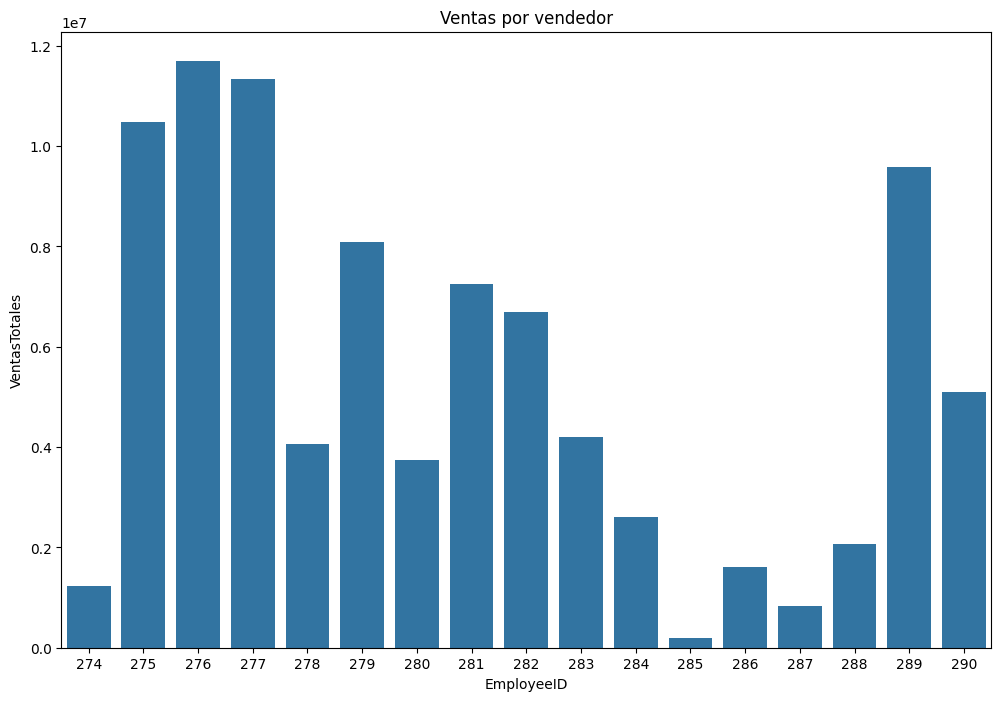

In [30]:
ventas_por_vendedor = ventas_empleado.groupby('EmployeeID')['VentasTotales'].sum().reset_index()
sns.barplot(x='EmployeeID', y='VentasTotales', data=ventas_por_vendedor)
plt.title('Ventas por vendedor')
plt.show()

Empleado con Mayor Venta:
Para encontrar al empleado con la mayor venta, simplemente identificamos el valor más alto en la columna “VentasTotales”.
En este caso, el empleado con el mayor valor de ventas es Stephen Jiang, con un total de $12,359,934.45.
Empleado con Menor Venta:
Para encontrar al empleado con la menor venta, identificamos el valor más bajo en la columna “VentasTotales”.
El empleado con la menor venta es Syed Abbas, con un total de $195,528.78.

In [31]:
print(ventas_empleado)

    EmployeeID                  Vendedor  VentasTotales
0          274             Stephen Jiang     1235934.45
1          275            Michael Blythe    10475367.08
2          276            Linda Mitchell    11695019.06
3          277            Jillian Carson    11342385.90
4          278            Garrett Vargas     4069422.21
5          279               Tsvi Reiter     8086073.68
6          280       Pamela Ansman-Wolfe     3748246.12
7          281                   Shu Ito     7259567.88
8          282              José Saraiva     6683536.66
9          283            David Campbell     4207894.60
10         284          Tete Mensa-Annan     2608116.38
11         285                Syed Abbas      195528.78
12         286             Lynn Tsoflias     1606441.45
13         287               Amy Alberts      826417.47
14         288             Rachel Valdez     2062393.14
15         289                   Jae Pak     9585124.95
16         290  Ranjit Varkey Chudukatil     508